# Guided Project #4 - Visualizing Earnings Based on College Majors
By [Luis Munguia](http://www.linkedin.com/in/luis-munguia) and [Dataquest](http://www.dataquest.io)

In this guided project, I'll work with a dataset on the job outcomes of students who graduated from college between 2010 and 2012 compiled by FiveThirtyEight from American Community Survey information.

The data dictionary is as follows:

* `Rank`: Rank by median earnings (the dataset is ordered by this column).
* `Major_code`: Major code.
* `Major`: Major description.
* `Major_category`: Category of major.
* `Total`: Total number of people with major.
* `Sample_size`: Sample size (unweighted) of full-time.
* `Men`: Male graduates.
* `Women`: Female graduates.
* `ShareWomen`: Women as share of total.
* `Employed`: Number employed.
* `Median`: Median salary of full-time, year-round workers.
* `Low_wage_jobs`: Number in low-wage service jobs.
* `Full_time`: Number employed 35 hours or more.
* `Part_time`: Number employed less than 35 hours.

This project's aim is to do exploratory analysis and answer questions about the popularity of majors and gender distribution.

## 1.- Read CSV file using Pandas, NumPy & Matplotlib.
Use Pandas to read file and start exploring data. Determine if there are any cases in which to drop rows with missing values.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as plt
recent_grads = pd.read_csv("recent-grads.csv")
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [2]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [3]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [4]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [5]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

In [6]:
raw_data_count = recent_grads.count()
raw_data_count

Rank                    173
Major_code              173
Major                   173
Total                   172
Men                     172
Women                   172
Major_category          173
ShareWomen              172
Sample_size             173
Employed                173
Full_time               173
Part_time               173
Full_time_year_round    173
Unemployed              173
Unemployment_rate       173
Median                  173
P25th                   173
P75th                   173
College_jobs            173
Non_college_jobs        173
Low_wage_jobs           173
dtype: int64

In [7]:
recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.count()
cleaned_data_count

Rank                    172
Major_code              172
Major                   172
Total                   172
Men                     172
Women                   172
Major_category          172
ShareWomen              172
Sample_size             172
Employed                172
Full_time               172
Part_time               172
Full_time_year_round    172
Unemployed              172
Unemployment_rate       172
Median                  172
P25th                   172
P75th                   172
College_jobs            172
Non_college_jobs        172
Low_wage_jobs           172
dtype: int64

According to the row data above, it seems only 1 row was dropped from the dataset. That is excellent news, as my personal objective is to drop less than 10% of all data points in order to ensure proper analysis.

## 2.- Pandas scatter plotting.
Use Pandas to plot charts and explore data.

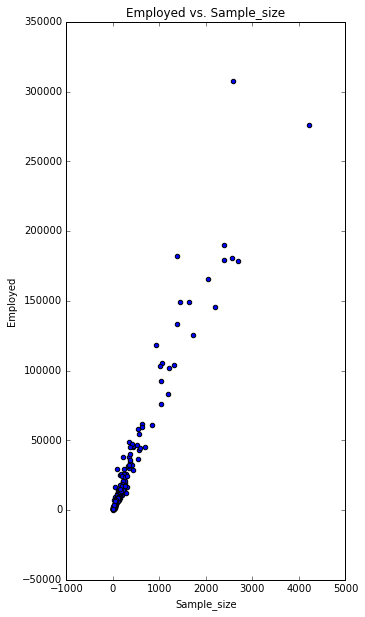

In [8]:
recent_grads.plot(x='Sample_size', y='Employed', kind='scatter', title='Employed vs. Sample_size', figsize=(5,10))

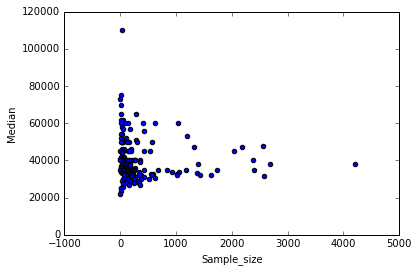

In [9]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter')

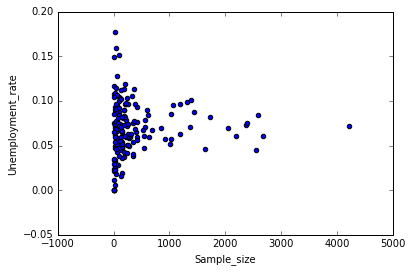

In [10]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')

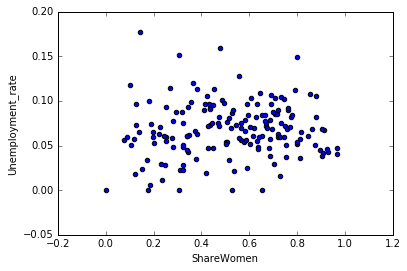

In [11]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')

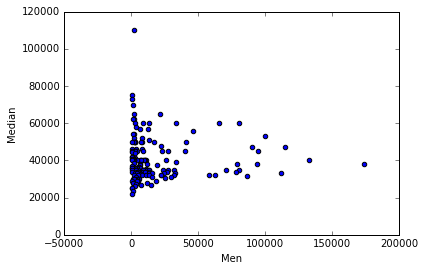

In [12]:
recent_grads.plot(x='Men', y='Median', kind='scatter')

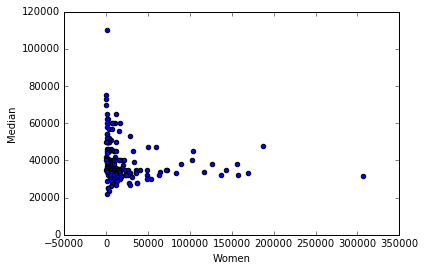

In [13]:
recent_grads.plot(x='Women', y='Median', kind='scatter')

Let's see how Popular and Unpopular majors correlate to Median Salary.

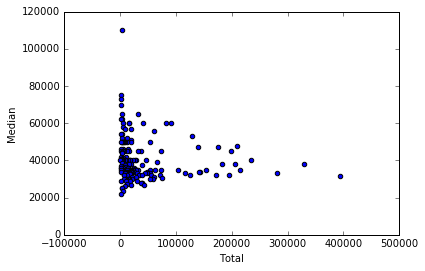

In [14]:
recent_grads.plot(x='Total', y='Median', kind='scatter')

According to this, Total and Median are negatevily correlated. It seem that students in more popular majors make less money. Let's zoom a bit and segregate data from the mean.

In [15]:
recent_grads["Total"] = recent_grads["Total"].astype(float)
popular_majors = recent_grads[recent_grads["Total"] >= 40000]
unpopular_majors = recent_grads[recent_grads["Total"] < 40000]

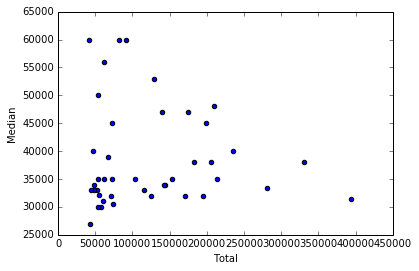

In [16]:
popular_majors.plot(x='Total', y='Median', kind='scatter')

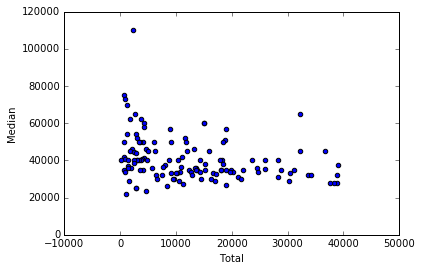

In [17]:
unpopular_majors.plot(x='Total', y='Median', kind='scatter')

Students in unpopular majors make almost 20,000 more than their peers. Next, let's see how sex influences median salary.

In [18]:
recent_grads["ShareWomen"] = recent_grads["ShareWomen"].astype(float)
popular_majors = recent_grads[recent_grads["ShareWomen"] >= .6]
unpopular_majors = recent_grads[recent_grads["ShareWomen"] < .6]

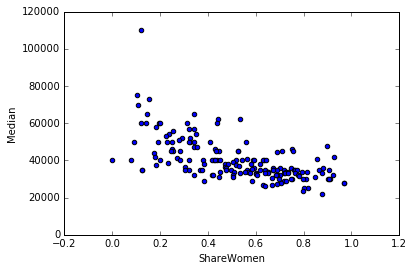

In [19]:
recent_grads.plot(x='ShareWomen', y='Median', kind='scatter')

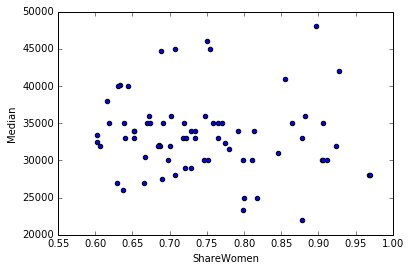

In [20]:
popular_majors.plot(x='ShareWomen', y='Median', kind='scatter')

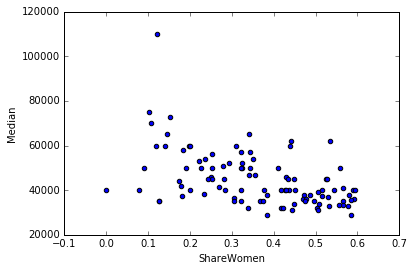

In [21]:
unpopular_majors.plot(x='ShareWomen', y='Median', kind='scatter')

According to the above, students that majored in subjects that were majority female make less money than their peers. Now, let's see if there is any link between the number of full-time employees and median salary.

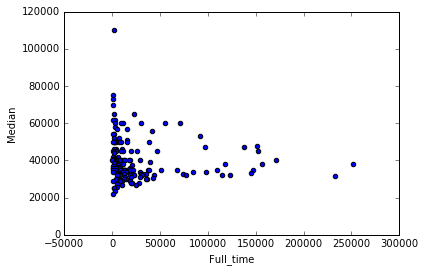

In [22]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter')

According to the above, there is a negative link between these two variables. It seems that the less full-time employees a major has their median salary increases.

## 2.- Pandas histograms plotting.
Use Pandas to plot charts and explore distribution of values.

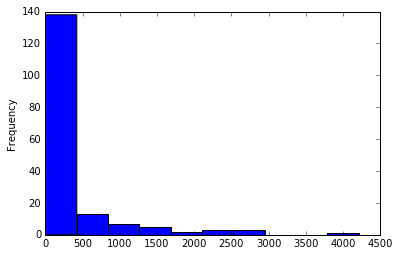

In [23]:
recent_grads['Sample_size'].plot(kind='hist')

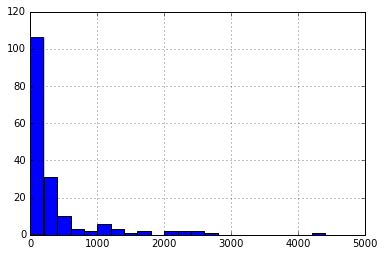

In [24]:
recent_grads['Sample_size'].hist(bins=25, range=(0,5000))

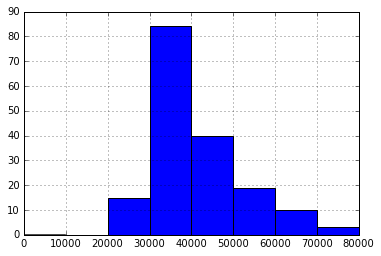

In [25]:
recent_grads['Median'].hist(bins=8, range=(0,80000))

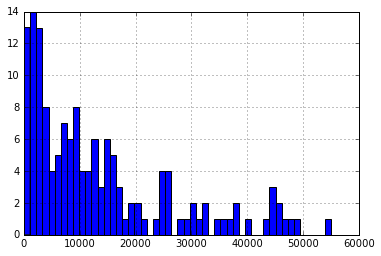

In [26]:
recent_grads['Employed'].hist(bins=50, range=(0,55000))

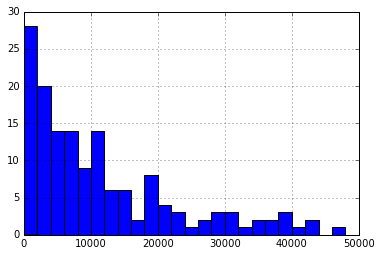

In [27]:
recent_grads['Full_time'].hist(bins=25, range=(0,50000))

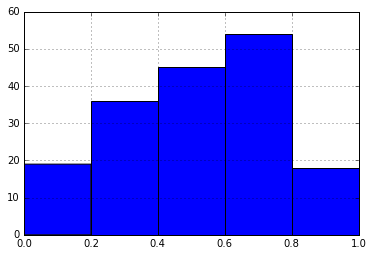

In [28]:
recent_grads['ShareWomen'].hist(bins=5, range=(0,1))

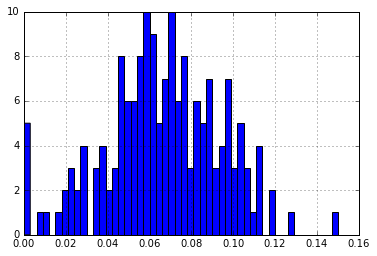

In [29]:
recent_grads['Unemployment_rate'].hist(bins=50, range=(0,.15))

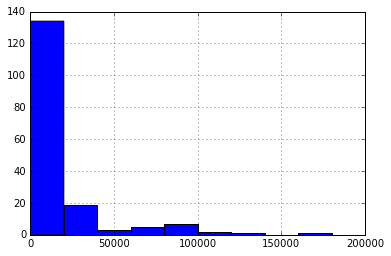

In [30]:
recent_grads['Men'].hist(bins=10, range=(0,200000))

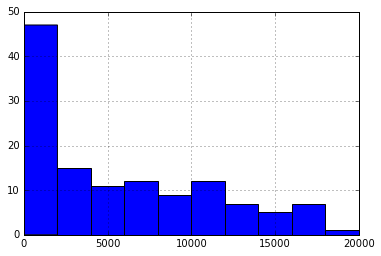

In [31]:
recent_grads['Women'].hist(bins=10, range=(0,20000))

According to the above the most common median salary is 30,000 to 40,000 and almost 40% of all majors are predominantly female.

## 3.- Pandas scatter_matrix plotting.
Use Pandas.plotting to plot scatter matrixes of the variables previously analysed.

In [32]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb7c2779f98>,
      dtype=object)

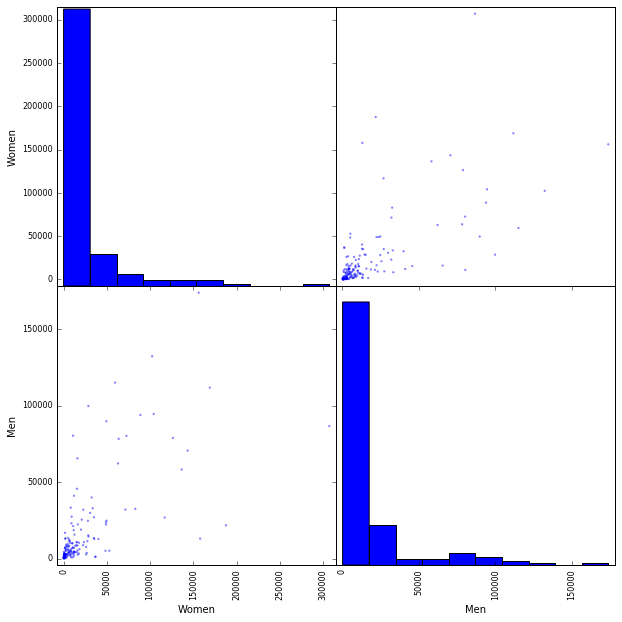

In [33]:
scatter_matrix(recent_grads[['Women', 'Men']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb7c2597c88>,
      dtype=object)

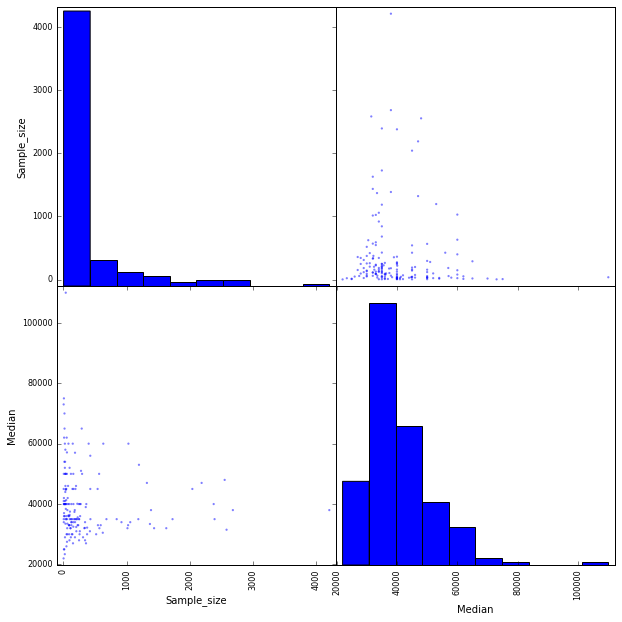

In [34]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb7c26e17f0>,
      dtype=object)

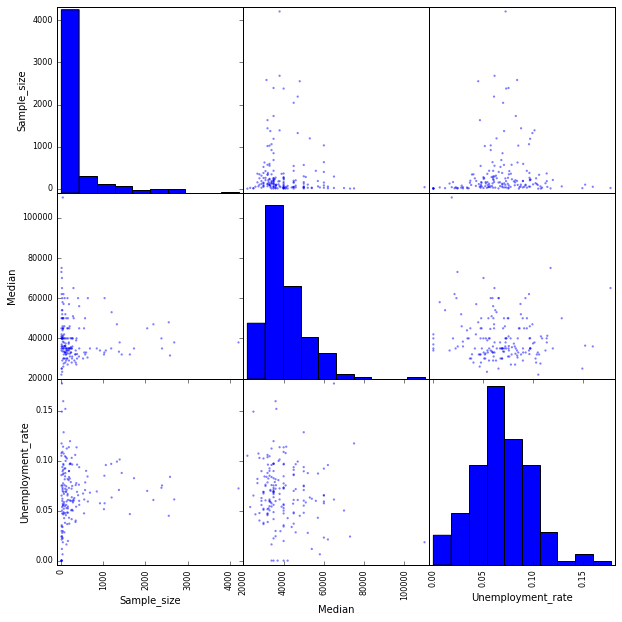

In [35]:
scatter_matrix(recent_grads[['Sample_size', 'Median',
                             "Unemployment_rate"]], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb7c203eb70>,
      dtype=object)

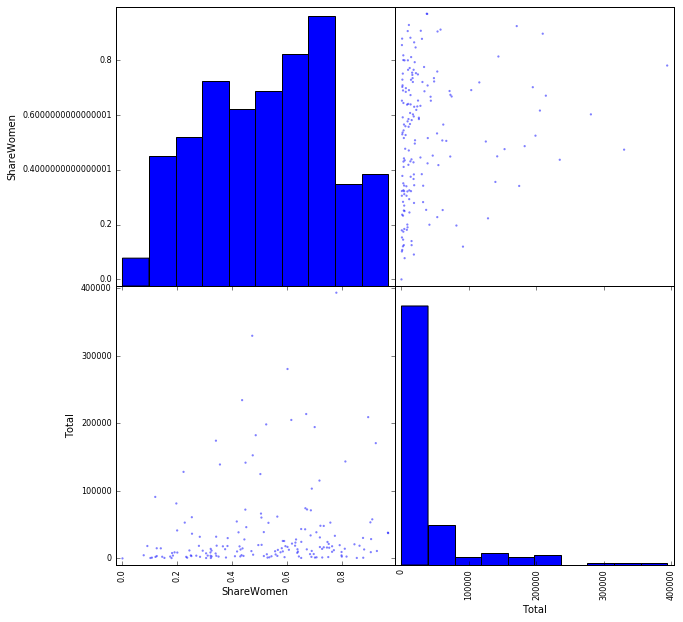

In [36]:
scatter_matrix(recent_grads[['ShareWomen', 'Total']], figsize=(10,10))

Insights are consistent throughout the plots.

## 4.- Pandas bar plotting.
Use pandas to plot bar graphs to compare the first and last rows of the sorted dataframe.

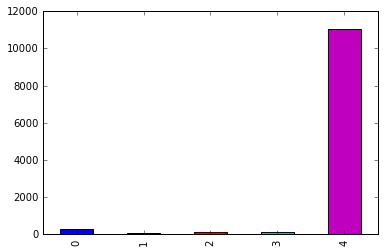

In [37]:
recent_grads[:5]['Women'].plot(kind='bar')

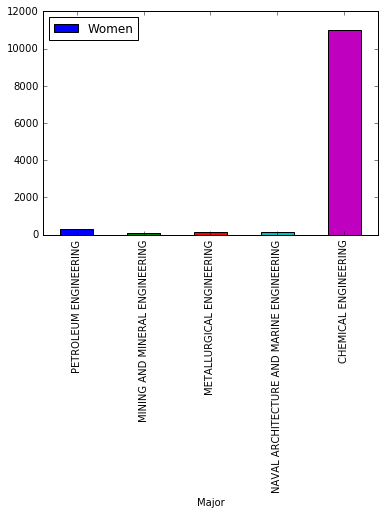

In [38]:
recent_grads[:5].plot.bar(x='Major', y='Women')

In [56]:
recent_grads_sorted = recent_grads[["Major","ShareWomen"]].sort_values(by="ShareWomen", ascending=True)

In [57]:
recent_grads_sorted.head()

,Major,ShareWomen
73,MILITARY TECHNOLOGIES,0.000000
66,MECHANICAL ENGINEERING RELATED TECHNOLOGIES,0.077453
26,CONSTRUCTION SERVICES,0.090713
1,MINING AND MINERAL ENGINEERING,0.101852
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,0.107313


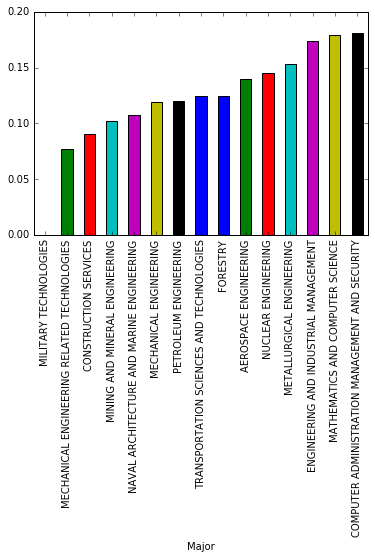

In [64]:
recent_grads_sorted[:15].plot.bar(x="Major", y="ShareWomen", legend=False)

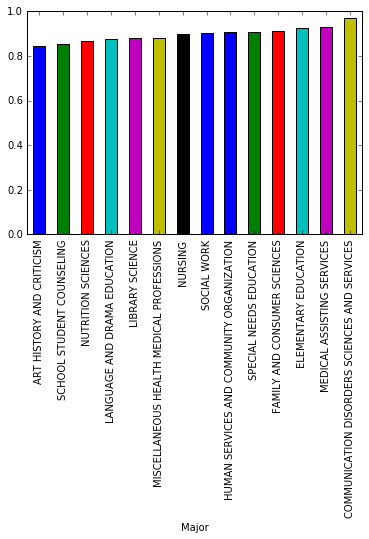

In [65]:
recent_grads_sorted[-15:-1].plot.bar(x="Major", y="ShareWomen", legend=False)

It seems that women have less participation in engineering majors, and more participation in social majors.

## 5.- Pandas grouped bar, box plot and hexagonal bin plotting.
Use pandas to plot new graphs to analyze data.

In [43]:
major_m_w = recent_grads[["Major","Men","Women"]]
major_m_w.head()

,Major,Men,Women
0,PETROLEUM ENGINEERING,2057.0,282.0
1,MINING AND MINERAL ENGINEERING,679.0,77.0
2,METALLURGICAL ENGINEERING,725.0,131.0
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1123.0,135.0
4,CHEMICAL ENGINEERING,21239.0,11021.0


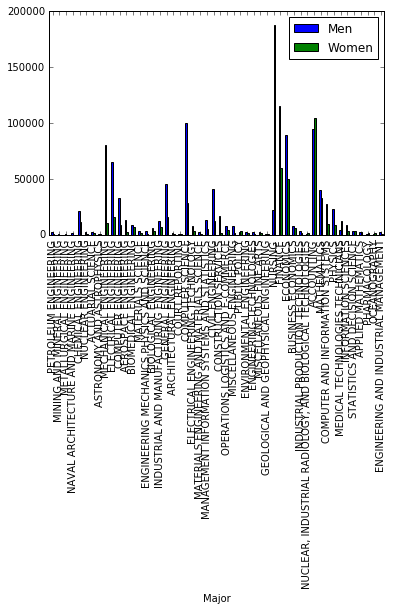

In [73]:
major_m_w[:50].plot.bar(x="Major")

It's impossible to read, I tried to plot all rows but Jupyter was not able to do it. I will have to slice it further.

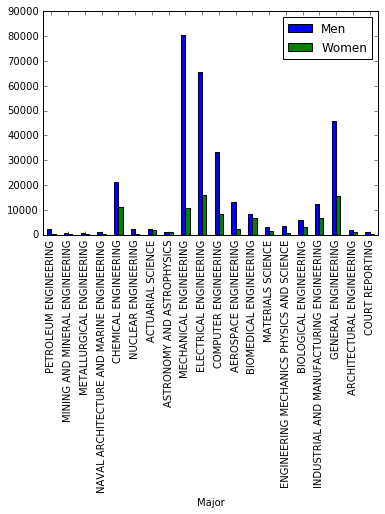

In [69]:
major_m_w[:20].plot.bar(x="Major")

Grouped bar plots are better at displaying the gap between Men and Women in Majors.

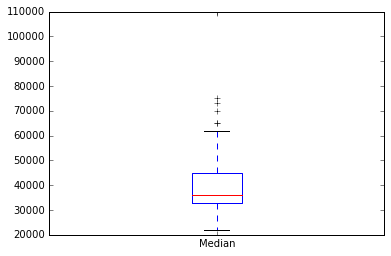

In [46]:
recent_grads["Median"].plot.box()

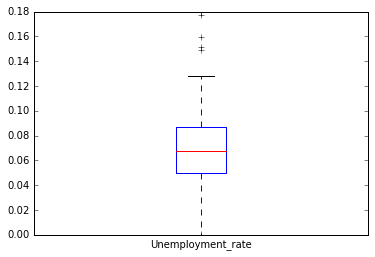

In [47]:
recent_grads["Unemployment_rate"].plot.box()

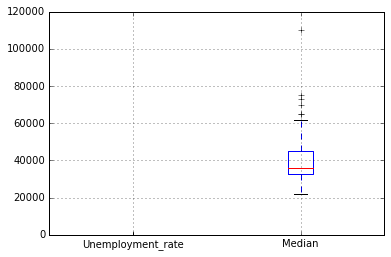

In [77]:
recent_grads.boxplot(column=["Unemployment_rate","Median"])

Using box plots on a series is another way to explore distribution. It's cleaner than bar plots and plots outliers so I can have to opportunity to drop them.

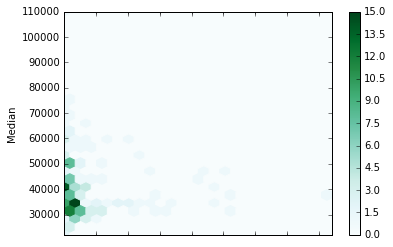

In [48]:
recent_grads.plot.hexbin(x='Sample_size', y='Median', gridsize=25)

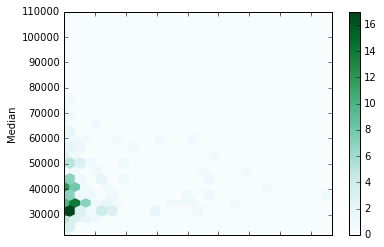

In [49]:
recent_grads.plot.hexbin(x='Men', y='Median', gridsize=25)

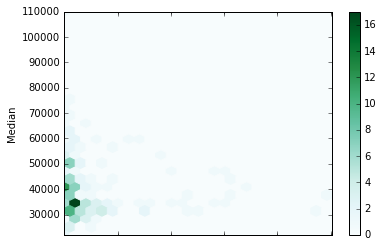

In [50]:
recent_grads.plot.hexbin(x='Full_time', y='Median', gridsize=25)

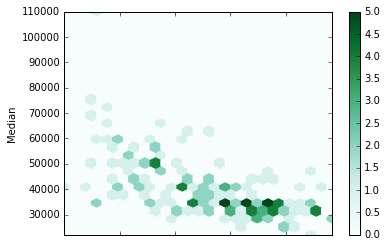

In [51]:
recent_grads.plot.hexbin(x='ShareWomen', y='Median', gridsize=25)

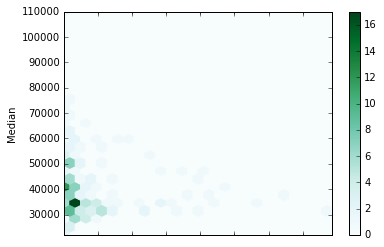

In [52]:
recent_grads.plot.hexbin(x='Total', y='Median', gridsize=25)

Hexagonal bin plots were not as amazing as I thought they would be. For the moment I won't be using them.

## 6.- Closing commentary

These are my findings after reviewing ACS data and doing simple visualizations:

* Students in popular majors make less money than their peers.
* Students in unpopular majors make almost 20,000 more than their peers.
* Students that majored in subjects that were majority female make less money than their peers.
* The less full-time employees a major has their median salary increases.
* The most common median salary is 30,000 to 40,000.
* Almost 40% of all majors are predominantly female.
* Women have less participation in engineering majors, and more participation in social majors.

Take aways:

* Target undergraduates stating the benefits of studying unpopular majors.
* Target graduates of unpopular majors with benefits.
* Use median salary to improve minimum wage.
* Improve women participation in engineering and other STEM majors.